In [1]:
import time
inicio = time.time()

# Carga de Paquetes y Librerias

In [2]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
from numpy import array
import datetime as dt           # Permite trabajar con fechas

# Machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


# Reducción de dimensiones
from sklearn.decomposition import PCA

# Regresión lineal
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Pretty print
from pprint import pprint

#SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Google
from google.colab import files  # Permite descargar archivos directamente desde Colab


In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [4]:
def TrainingSets(data, dataξ,step_back):
    train_data  = data.copy()
    train_dataξ = dataξ.copy()
    # training set
    X_train, ξ_train = [], []
    for i in range(len(train_data)-step_back - 1):
        a = train_data[i:(i+step_back)]
        X_train.append(a)
        ξ_train.append(train_dataξ[i + step_back])
    X_train = np.array(X_train); ξ_train = np.array(ξ_train);
    return  X_train, ξ_train

# Carga de Base de Datos

In [5]:
#cargar datos desde drive acceso libre
FILEID = "1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Departamentos.zip && rm -rf /tmp/cookies.txt
!unzip Departamentos.zip
!dir

--2023-07-23 20:05:15--  https://docs.google.com/uc?export=download&confirm=&id=1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_
Resolving docs.google.com (docs.google.com)... 142.251.162.138, 142.251.162.113, 142.251.162.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.162.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a6duthgldt21q01vkdfvfr0n79ti4au4/1690142700000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=a42d04c2-0d1f-447f-973f-b1df9b50e0fd [following]
--2023-07-23 20:05:15--  https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a6duthgldt21q01vkdfvfr0n79ti4au4/1690142700000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=a42d04c2-0d1f-447f-973f-b1df9b50e0fd
Resolving doc-0c-6k-docs.googleusercontent.com (doc-0c-6k-docs.googleusercontent.com)... 142.251.107.1

In [6]:
ls

Demanda_Arreglo_LSTM_Rd_CL.xlsx   Demanda_Arreglo_Mean.xlsx
Demanda_Arreglo_LSTM_Rd_Sin.xlsx  Departamentos.zip
Demanda_Arreglo_LSTM_Rd.xlsx      sample_data/


In [7]:
df=pd.read_excel('/content/Demanda_Arreglo_Mean.xlsx')
df.fillna(df.mean(), inplace=True)

In [8]:
df = df.drop('Date', axis=1)
# Se establese nuevamente en el indice temporal en la nueva variable 'a', y al DataFrame se incliye la informacion de frecuencia horaria 'H' de la base de datos
date_rng = pd.date_range(start='2020-10-01', end='2023-01-01', freq='H')
# Establece el índice del DataFrame a las fechas generadas
df.set_index(date_rng[0:-1], inplace=True)

<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh'}, xlabel='Fecha', ylabel='kWh'>

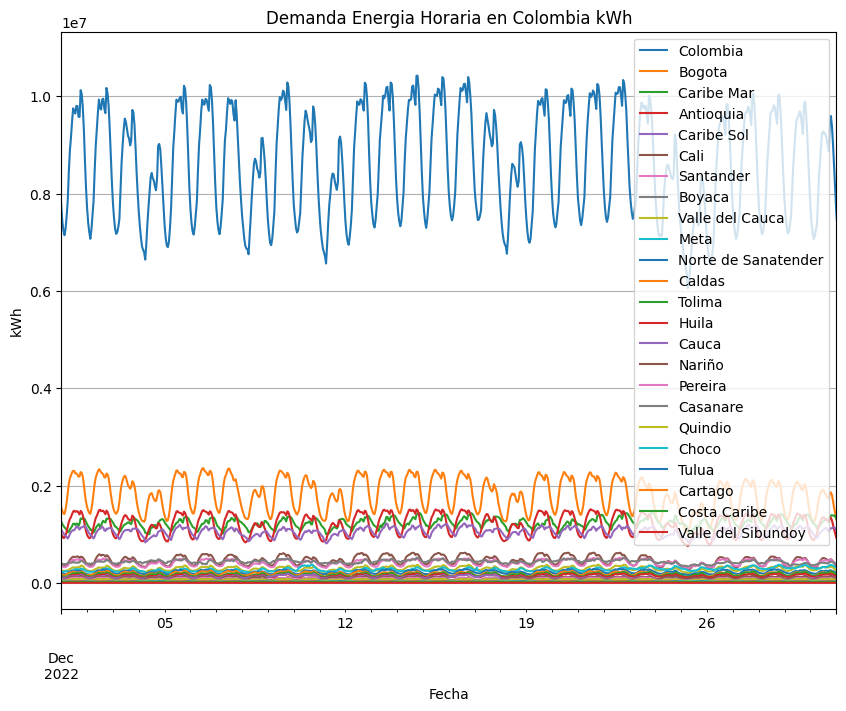

In [9]:
df.plot(kind='line',figsize=(10,7.5),title='Demanda Energia Horaria en Colombia kWh', grid=True, ylabel='kWh', xlabel='Fecha',xlim=('2022-12-01','2022-12-31'))

# Normalizacion


In [10]:
df1=df.copy()

In [11]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(df1)
df1=scaler.transform(df1)
#plt.plot(df1)

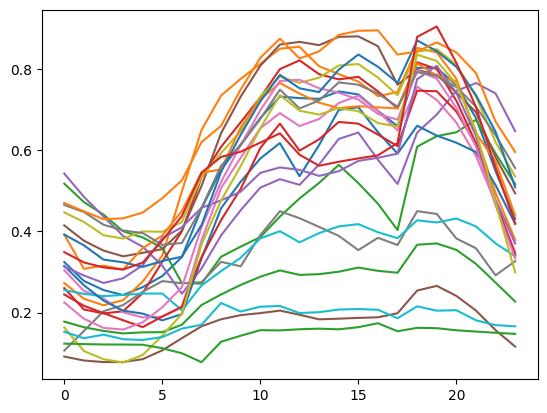

In [12]:
plt.plot(df1[0:24,:])
plt.show()

In [13]:
Ts1=df1.copy()
out=Ts1[:,0]
print('Tamaño Serie Horaria: ', Ts1.shape)
print('Tamaño Serie Salida: ', out.shape)

Tamaño Serie Horaria:  (19728, 24)
Tamaño Serie Salida:  (19728,)


# Modelos DL


## TimeStep = 18

### Conjunto de Entrenamiento


In [14]:
#  Particion X,Y y Time_step/step_back/window
step_back = 18

X1, Y1 = TrainingSets(data = Ts1, dataξ = out,step_back=step_back)


#  Particion Train_Test
Part = 0.8

# Serie 1
X_train = X1[:15781]
X_Val = X1[15781:16570]
X_test = X1[16570:]


Y_train = Y1[:15781]
Y_Val = Y1[15781:16570]
Y_test = Y1[16570:]



In [15]:
# Nuemero de Epocas
N=100
bsz=512

In [16]:
callbacks = [keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=0.0001),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, verbose=1),]

### LSTM

In [17]:
model_LSTM = keras.models.Sequential([
                                     keras.layers.LSTM(100, return_sequences=True, input_shape=[step_back,Ts1.shape[1]]),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(1)
])
model_LSTM.summary()

# Training

model_LSTM.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
history = model_LSTM.fit(X_train, Y_train, epochs=N, batch_size=bsz, callbacks=callbacks, validation_data=[ X_Val, Y_Val ])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 18, 100)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 18, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 18, 100)           80400     
                                                                 
 lstm_3 (LSTM)               (None, 1)                 408       
                                                                 
Total params: 211,208
Trainable params: 211,208
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
31/31 [==============================] - 14s 65ms/step - loss: 0.0601 - mae: 0.1998 - mse: 0.0601 - val_loss: 0.0453 - val_mae: 0.1836 - val_mse: 0.0453 - lr: 0.0010
Epoc

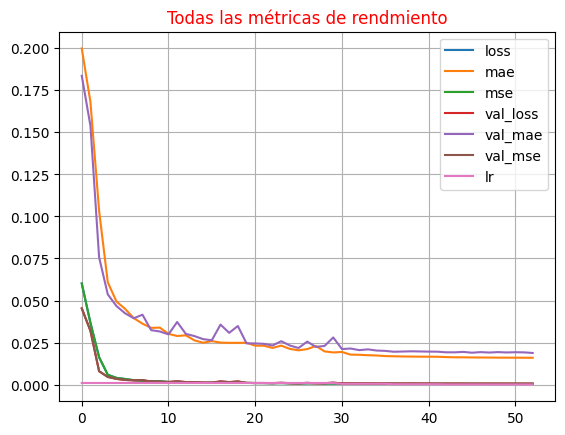

In [18]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

In [20]:
model_LSTM.save('model_LSTM_M_18S.h5')
print('Model Saved!')

Model Saved!


In [21]:
files.download('/content/model_LSTM_M_18S.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conformal RNN M 36

In [22]:
X_train=X_train.copy()
y_train=Y_train.copy()
X_cal=X_Val.copy()
y_cal=Y_Val.copy()
X_val=X_test.copy()
y_val=Y_test.copy()

In [23]:
alpha = 0.91
f=model_LSTM.predict(X_cal)
model=model_LSTM
N=len(y_cal)
q_yhat=np.quantile(np.abs(y_cal-f),np.ceil((N+1)*(1-alpha))/N)
print(q_yhat)

25/25 [==============================] - 1s 4ms/step
0.027738261165806966


In [24]:
f_val=model.predict(X_val).flatten()

99/99 [==============================] - 0s 4ms/step


In [25]:
def calculate_coverage(lower_bound,upper_bound,y_true):
    out_of_bound=0
    N=len(y_true)

    for i in range(N):
        if y_true[i]<lower_bound[i] or y_true[i]>upper_bound[i]:
            out_of_bound+=1

    return 1-out_of_bound/N

print('Coverage of {}'.format(calculate_coverage(f_val-q_yhat,f_val+q_yhat,y_val)))
Cover=calculate_coverage(f_val-q_yhat,f_val+q_yhat,y_val)

Coverage of 0.7072316024211532


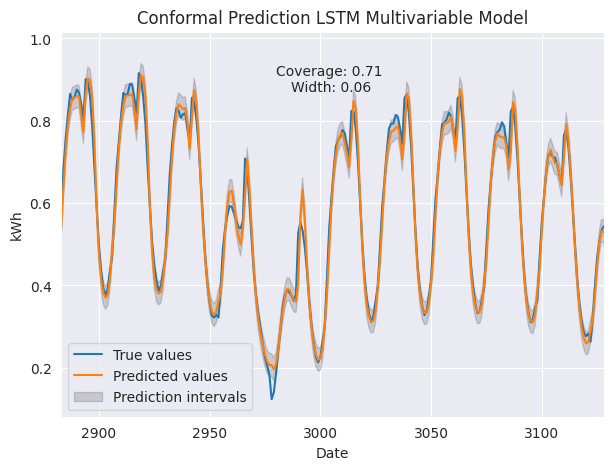

In [26]:

plt.rcParams["figure.figsize"] = (7,5)
sns.set_style("darkgrid", {'axes.grid' : True})
ind=[i for i in range(len(y_val))]
plt.plot(ind,y_val,label='True values')
plt.plot(ind,f_val,label='Predicted values')
plt.fill_between(ind,f_val-q_yhat,f_val+q_yhat,
                 color='k', alpha=.15,label='Prediction intervals')

plt.xlim(2883,3128)

center_x = (2883 + 3128) / 2
center_y = (max(f_val) + min(f_val)) / 2
plt.text(3005, 0.9, f"Coverage: {round(Cover,2)} \nWidth: {round(2*q_yhat, 2)}",  ha="center", va="center")

plt.title("Conformal Prediction LSTM Multivariable Model")

plt.xlabel("Date")
plt.ylabel("kWh")

plt.legend()
plt.show()

In [27]:
print(2*q_yhat)

0.05547652233161393


# tiempo

In [28]:
fin = time.time()

# Calcula el tiempo transcurrido
tiempo_transcurrido = fin - inicio
print("Tiempo transcurrido: ", tiempo_transcurrido, "segundos")

Tiempo transcurrido:  221.41937685012817 segundos
